# MACHINE LEARNING PROJECT
## KC DATASET

### Library

In [105]:

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import patches as patches
import pandas as pd
from os import *
from os.path import isfile, join
import sys
import scipy as scipy
import requests as rqs
import random
import time
from datetime import datetime
from statsmodels.tsa.seasonal import STL
from matplotlib import gridspec
%matplotlib inline

# time series analysis
import statsmodels.api as sm
import datetime as dt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#from tbats import TBATS, BATS
import seaborn as sns
sns.set_theme(style="whitegrid")
from statsmodels.tsa.stattools import grangercausalitytests
from IPython.display import display

plt.rcParams["figure.figsize"] = (16,9)

# preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# keras models
from keras.layers import LSTM, Dense, GRU, CuDNNGRU, CuDNNLSTM, Activation, BatchNormalization, Dropout, LeakyReLU
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.regularizers import l1
from keras import backend as K
#from keras.optimizers import RMSprop, Adam
from keras.callbacks import ModelCheckpoint
from scipy.stats import norm


# visualizzazione
import seaborn as sns
sns.set_style('darkgrid', {"axes.facecolor": "0.94"})
sns.set_color_codes(palette='pastel')
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#extra
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import folium
from folium.plugins import HeatMap
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Dataset

In [23]:
df = pd.read_csv('kc_house_data_corretto.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [19]:
#ORGANIZO DATA
#df["Date"]=df["Date"] +" "+ df["Hour"]
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
#del df['Hour']
#df = df.rename(columns={'Date': 'DateHour'})
df.sort_values(by=['date'], inplace = True)
df.set_index( "date", inplace=True )
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
date,,,,,,,,,,,,,,,,,,,,
2014-05-02,5561000190,437500.0,3,2.25,1970,35100,2.0,0,0,4,9,1970,0,1977,0,98027,47.4635,-121.991,2340,35100
2014-05-02,472000620,790000.0,3,2.50,2600,4750,1.0,0,0,4,9,1700,900,1951,0,98117,47.6833,-122.400,2380,4750
2014-05-02,1024069009,675000.0,5,2.50,2820,67518,2.0,0,0,3,8,2820,0,1979,0,98029,47.5794,-122.025,2820,48351
2014-05-02,7853361370,555000.0,4,2.50,3310,6500,2.0,0,0,3,8,3310,0,2012,0,98065,47.5150,-121.870,2380,5000
2014-05-02,5056500260,440000.0,4,2.25,2160,8119,1.0,0,0,3,8,1080,1080,1966,0,98006,47.5443,-122.177,1850,9000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-05-14,1422700040,183000.0,3,1.00,1170,7320,1.0,0,0,3,7,1170,0,1962,0,98188,47.4685,-122.282,2040,7320
2015-05-14,8730000270,359000.0,2,2.75,1370,1140,2.0,0,0,3,8,1080,290,2009,0,98133,47.7052,-122.343,1370,1090
2015-05-15,7923600250,450000.0,5,2.00,1870,7344,1.5,0,0,3,7,1870,0,1960,0,98007,47.5951,-122.144,1870,7650


In [6]:
# ### FILTRARE TRA DUE DATE ESATTE
# df['2019-04-01' : '2019-07-01']

# ### FILTRARE PER ANNO, MESE, ...
# df[df.index.year==2019]
# opzioni: year, month, day, hour, minute, dayofweek (lunedì è lo zero)

# ### GROUP BY PER GIORNO, MEDIANDO
# df.resample('D').mean()

#INIZIO 2 maggio 2014
# FINE  27 maggio 2015

### No missing values

In [20]:
#MISSING VALUES
print(df.isnull().sum())

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [21]:
#UN PO' DI STATISTICHE 
rows = []

for year in [2014,2015]:
    for c in ['price']:
        dfy = df[df.index.year==year][c]
        descr = dfy.describe()
        descr['range'] = descr['max'] - descr['min']
        descr.name += '_' + str(year)
        rows.append(descr)

descr_df = pd.DataFrame(rows)
descr_df = descr_df[['mean', 'std', 'min', '25%', '50%', '75%', 'max', 'range']]
descr_df

,mean,std,min,25%,50%,75%,max,range
price_2014,539181.428415,369162.693855,78000.0,320000.0,450000.0,645000.0,7700000.0,7622000.0
price_2015,541988.992264,362841.814006,75000.0,324950.0,450500.0,643237.5,5350000.0,5275000.0


In [22]:
#ANALISI MENSILI
#per guardare media di un determinato mese
df14= df[df.index.year==2014]
df15= df[df.index.year==2015]

media_14=[]
media_15=[]
cont=1
while cont<=12:
    media_14.append(np.mean(df14["price"][df14.index.month==cont]))
    media_15.append(np.mean(df15["price"][df15.index.month==cont]))
    cont=cont+1

dataf14_price = pd.DataFrame(media_14,index=['Gennaio','Febbraio','Marzo','Aprile','Maggio','Giugno','Luglio','Agosto','Settembre','Ottobre','Novembre','Dicembre'],columns=["media price 14"])  
dataf15_price = pd.DataFrame(media_15,index=['Gennaio','Febbraio','Marzo','Aprile','Maggio','Giugno','Luglio','Agosto','Settembre','Ottobre','Novembre','Dicembre'],columns=["media price 15"])  
#dataf["media_u6"]=media_u6
dataf14_price=dataf14_price.sort_values(by='media price 14', ascending=False)
dataf15_price=dataf15_price.sort_values(by='media price 15', ascending=False)
display(dataf14_price,dataf15_price)
#print(dataf14_price)
#print(dataf15_price)



#y2=np.mean(df1["consumo_attiva_u6"][df1.index.month])
#plt.plot(x,y1)
#plt.plot(x,y2)
#plt.show()

,media price 14
Giugno,558002.199541
Maggio,548080.276584
Luglio,544788.764360
Ottobre,539026.971778
Agosto,536445.276804
Settembre,529253.821871
Dicembre,524461.866757
Novembre,521961.009213
Gennaio,NaN
Febbraio,NaN


,media price 15
Aprile,561837.774989
Maggio,558126.811146
Marzo,543977.187200
Gennaio,525870.889571
Febbraio,507851.371200
Giugno,NaN
Luglio,NaN
Agosto,NaN
Settembre,NaN
Ottobre,NaN


### Exploration

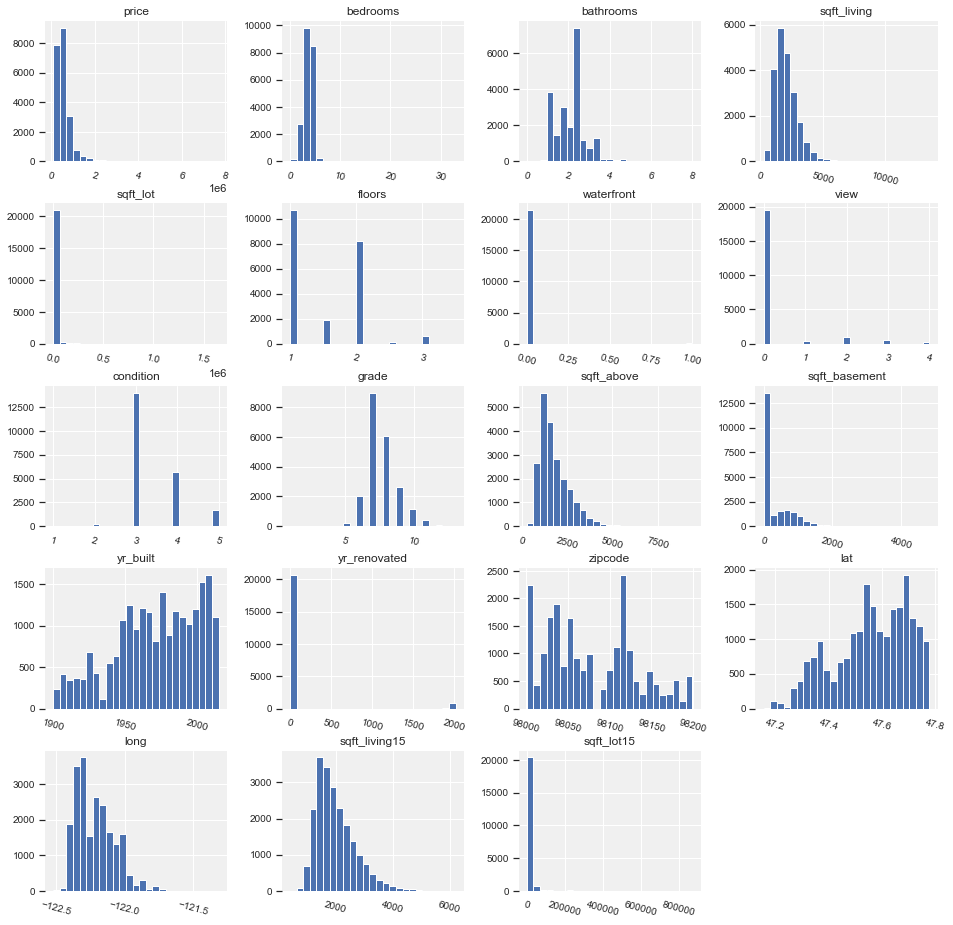

In [24]:
df1=df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
    'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
    'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
    'lat', 'long', 'sqft_living15', 'sqft_lot15']]
h = df1.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

valori price totali: 



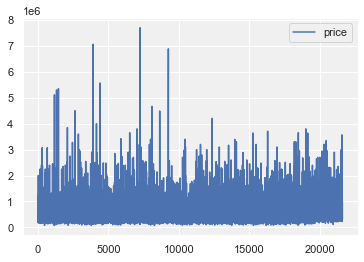

valori sqft_lot esterno: 



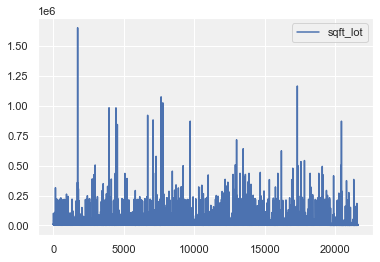

In [26]:
print("valori price totali: \n")
plt.plot(df['price'],label="price")
plt.legend()
plt.show()

print("valori sqft_lot esterno: \n")
plt.plot(df['sqft_lot'],label="sqft_lot")
plt.legend()
plt.show()


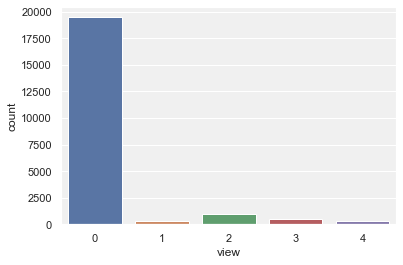

In [28]:
#si può notare che ci sono molte più case senza una view che negli altri casi
sns.countplot(x='view',data=df)

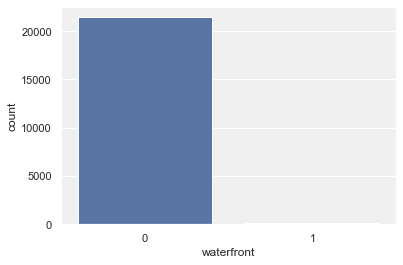

In [29]:
#molte poche waterfront houses
sns.countplot(x='waterfront',data=df)

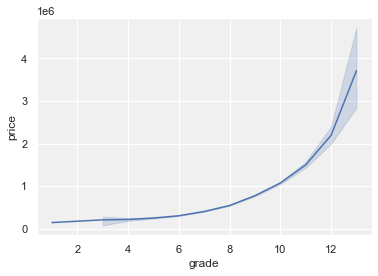

In [31]:
#più alto è il grade e più alto è il prezzo ovviamente. Si nota inoltre che i prezzi non variano molto fra 2 e 6 a causa forse di una forte similarità delle case

sns.lineplot(x='grade',y='price',data=df,palette='terrain')

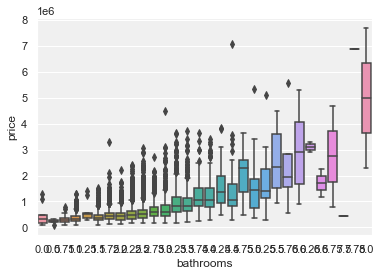

In [33]:
#controllo ora la relazione fra in numero di bagni e il prezzo

sns.boxplot(x='bathrooms',y='price',data=df)

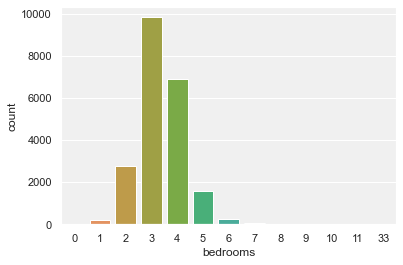

In [35]:
#si nota che sono presenti molte più case con 3 o 4 camere da letto rispetto alle altre, il che ci fa capire che ci sono molti altri attributi che valorizzano la casa e non solo le view, i waterfront o i bathrooms
sns.countplot(x='bedrooms',data=df)

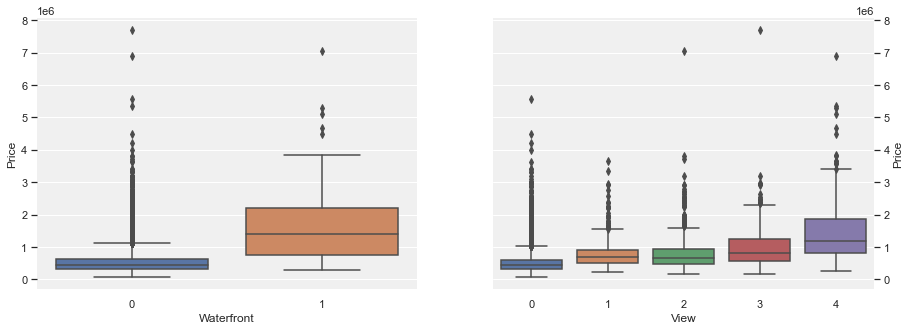

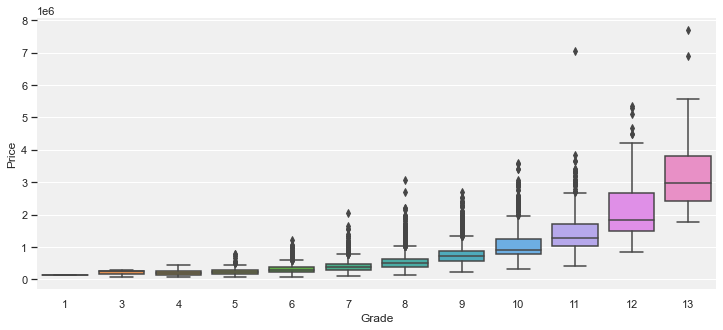

In [36]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['waterfront'],y=df['price'], ax=axes[0])
sns.boxplot(x=df['view'],y=df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Waterfront', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='View', ylabel='Price')

f, axe = plt.subplots(1, 1,figsize=(12.18,5))
sns.boxplot(x=df['grade'],y=df['price'], ax=axe)
sns.despine(left=True, bottom=True)
axe.yaxis.tick_left()
axe.set(xlabel='Grade', ylabel='Price');

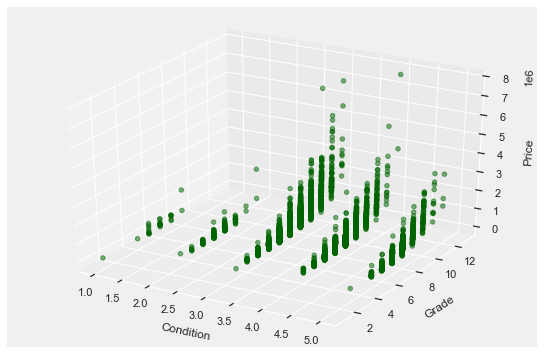

In [39]:
fig=plt.figure(figsize=(9.5,6.25))
ax=fig.add_subplot(1,1,1, projection="3d")
ax.scatter(df['condition'],df['grade'],df['price'],c="darkgreen",alpha=.5)
ax.set(xlabel='\nCondition',ylabel='\nGrade',zlabel='\nPrice');

[Text(0, 0.5, 'Price of the house'), Text(0.5, 0, 'Sqft Living Space')]

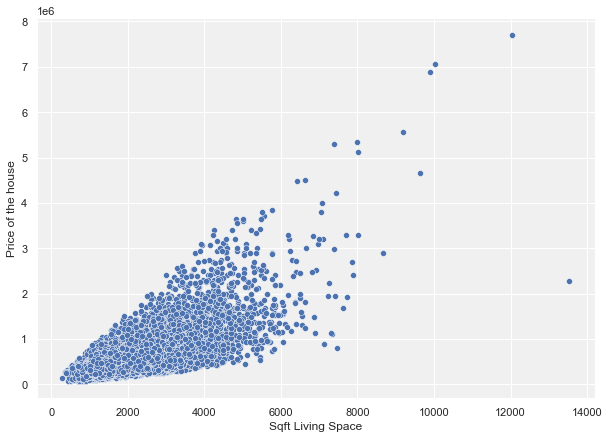

In [45]:
#analizzo ora Sqft Living 

plt.figure(figsize=(10, 7))
sns.scatterplot(x='sqft_living', y='price', data=df).set(xlabel='Sqft Living Space', ylabel='Price of the house')

#Sembra che questa variabile abbia una correlazione molto alta con il prezzo. In ogni caso ci sono anche degli outlier molto pesanti qui. Questi outlier potrebbero avere un cattivo effetto sull'accuratezza del nostro modello.
#outliers


<Figure size 1440x360 with 0 Axes>

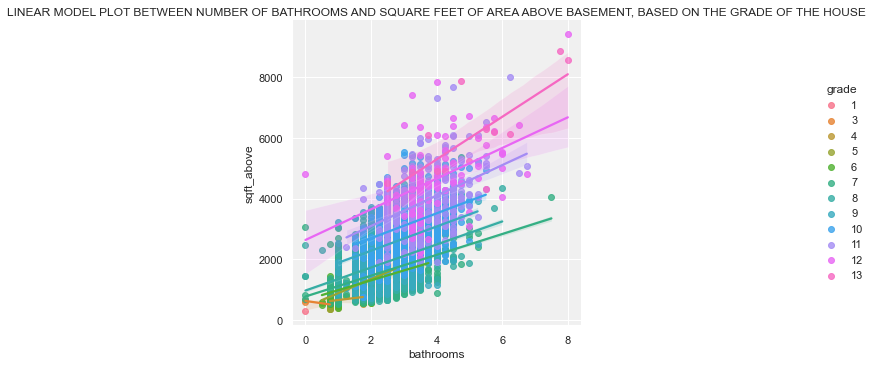

In [47]:
plt.figure(figsize=(20,5))
sns.lmplot(x='bathrooms',y='sqft_above',data=df,hue='grade')
plt.title("LINEAR MODEL PLOT BETWEEN NUMBER OF BATHROOMS AND SQUARE FEET OF AREA ABOVE BASEMENT, BASED ON THE GRADE OF THE HOUSE")
#plt.tight_layout()
plt.savefig("lm1")

Text(0.5, 1.0, 'BARPLOT OF CONDITION VERSUS PRICE')

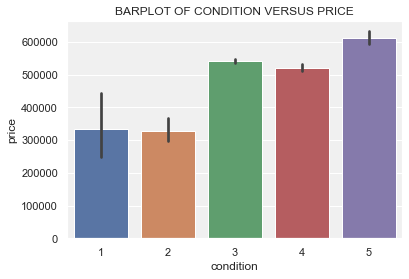

In [49]:
sns.barplot(x='condition',y='price',data=df)
plt.title("BARPLOT OF CONDITION VERSUS PRICE")

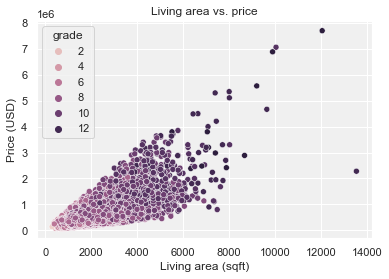

In [50]:
# Scatter plot of sqft living vs price with hue grade
sns.scatterplot(x = df['sqft_living'], y = df['price'], hue = df['grade'], data = df)
plt.title('Living area vs. price')
plt.xlabel('Living area (sqft)')
plt.ylabel('Price (USD)')
plt.show()

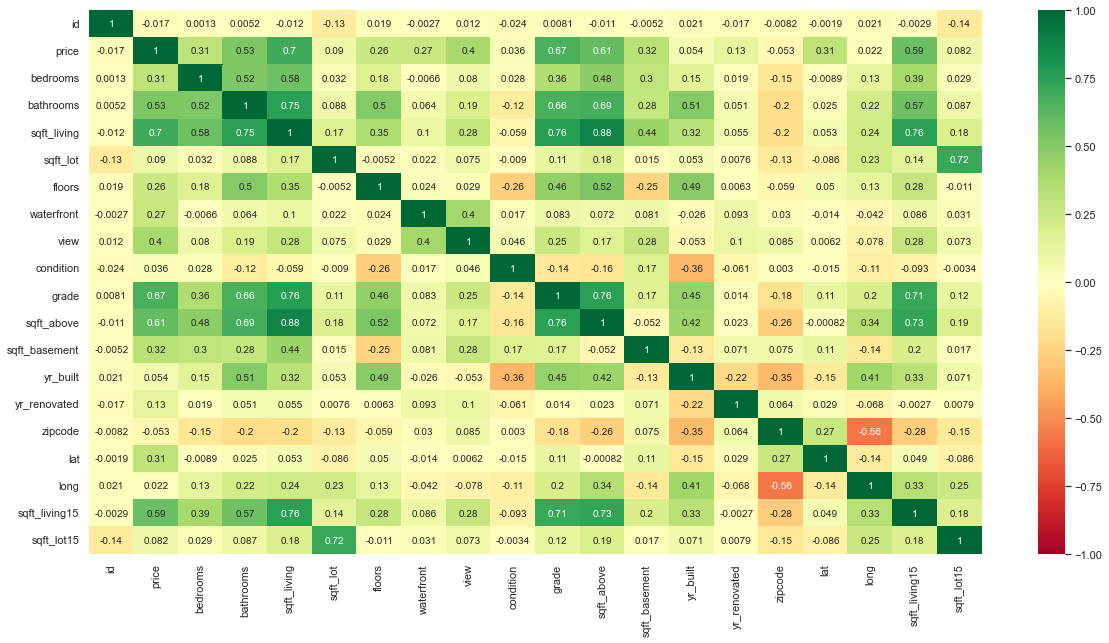

In [51]:
#controllo la correlazione che è presente fra la variabile prezzo e tutte le altre variabili
#all'interno della matrice di correlazione oltre a notare molte variabili correlate con il prezzo si notano molte variabili correlate fra di loro causando il problema della multicollinearità il quale se non sistemato andrà a ostacolare la predizione finale
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=+1, cmap='RdYlGn')

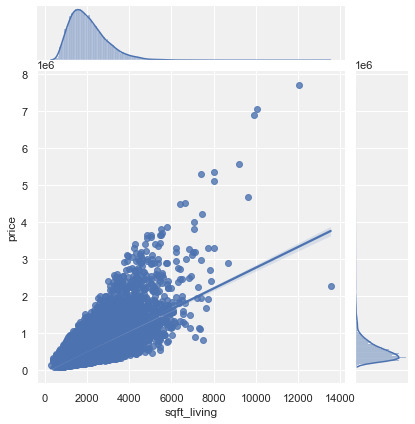

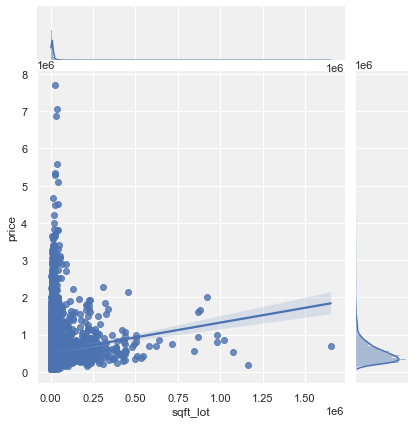

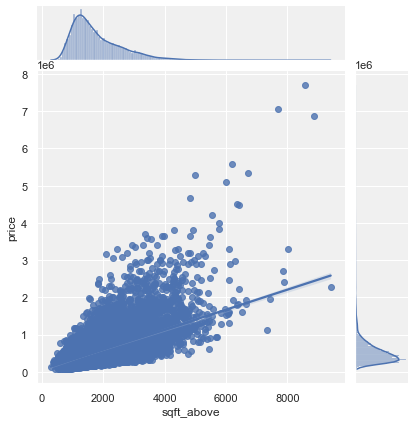

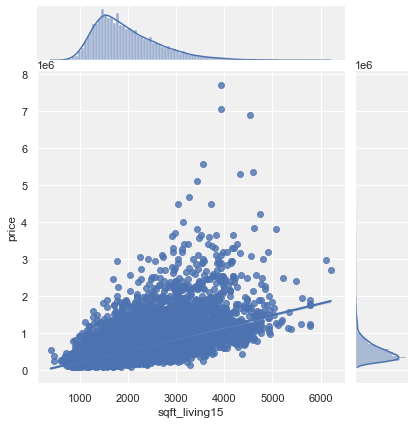

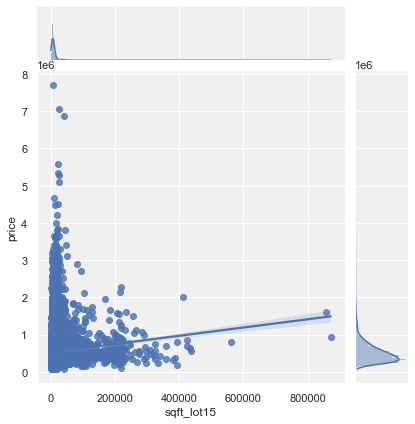

In [54]:
# Define list of continuous variables
cont_feat = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']


#  Plot jointplots
for feature in cont_feat:
    sns.jointplot(x = df[feature], y = df['price'], kind = 'reg')

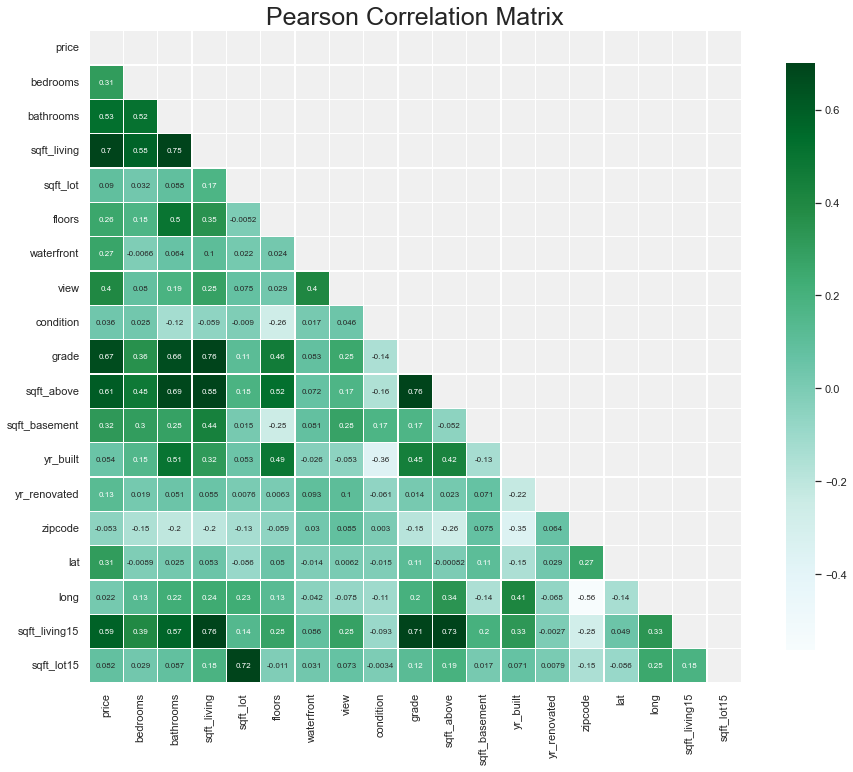

In [55]:
features = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

mask = np.zeros_like(df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

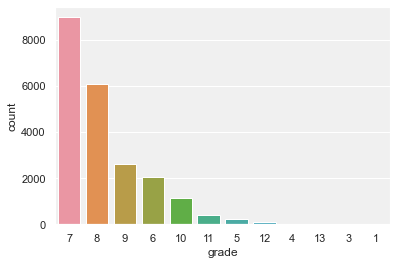

In [56]:
## using seaborn a count plot is plotted for the grade 
sns.countplot(df.grade,order=df['grade'].value_counts().index)

In [58]:
#controllo nuovamente gli outlier per controllare se le features sono più normalizzate dopo la trasformazione logaritmica
def calc_interquartile(house2, column):
    global lower, upper
    #calcolo il primo e il terzo quartile
    first_quartile, third_quartile = np.percentile(house2[column], 25), np.percentile(house2[column], 75)
    #calcolo il range interquantile
    iqr = third_quartile - first_quartile
    #outlier cutoff e uso il valore generico del calcolo degli outlier 1.5
    cutoff = iqr*1.5
    #calcolo il limite inferiore e superiore
    lower, upper = first_quartile - cutoff , third_quartile + cutoff
    #rimuovo gli outlier dalle colonne
    upper_outliers = house2[house2[column] > upper]
    lower_outliers = house2[house2[column] < lower]
    print('Lower outliers', lower_outliers.shape[0])
    print('Upper outliers', upper_outliers.shape[0])
    return print('total outliers', upper_outliers.shape[0] + lower_outliers.shape[0])




In [60]:
#GUARDO OUTLIERS
#for i in df.columns:
    #print('Total outliers in ', i)
    #calc_interquartile(df, i)
    #print()

In [61]:
#sostituire i valori 0 yr_renovated a yr_built per confronto
c=0
while c <21613:
    if df["yr_renovated"][c]==0:
        df["yr_renovated"][c]=df["yr_built"][c]
    c=c+1


In [13]:
df["yr_renovated"]

date
2014-05-02    2001
2014-05-02    1974
2014-05-02    2001
2014-05-02    1996
2014-05-02    1957
              ... 
2015-05-15    1960
2015-05-24    1941
2015-05-24    1941
2015-05-27    1924
2015-05-27    1924
Name: yr_renovated, Length: 43226, dtype: int64

In [64]:
#creo una nuova colonna con differenza
df["restoration_time"]=df["yr_renovated"]-df["yr_built"]
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,restoration_time
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,1955,98178,47.5112,-122.257,1340,5650,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,40
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,1933,98028,47.7379,-122.233,2720,8062,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,1965,98136,47.5208,-122.393,1360,5000,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,1987,98074,47.6168,-122.045,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009,2009,98103,47.6993,-122.346,1530,1509,0
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,2014,98146,47.5107,-122.362,1830,7200,0
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,2009,98144,47.5944,-122.299,1020,2007,0
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,1600,0,2004,2004,98027,47.5345,-122.069,1410,1287,0


In [11]:
#save new df
#df.to_csv(r'kc_house_data_corretto_preprocessed1.csv')

### MAP

In [65]:
print(df.lat.min(),"       :latitudine minima")
print(df.lat.max(),"       :latitudine massima")
print(df.long.min(),"       :longitudine minima")
print(df.long.max(),"       :longitudine massima")

BBox = (df.long.min(),   df.long.max(),      
         df.lat.min(), df.lat.max())

47.1559        :latitudine minima
47.7776        :latitudine massima
-122.519        :longitudine minima
-121.315        :longitudine massima


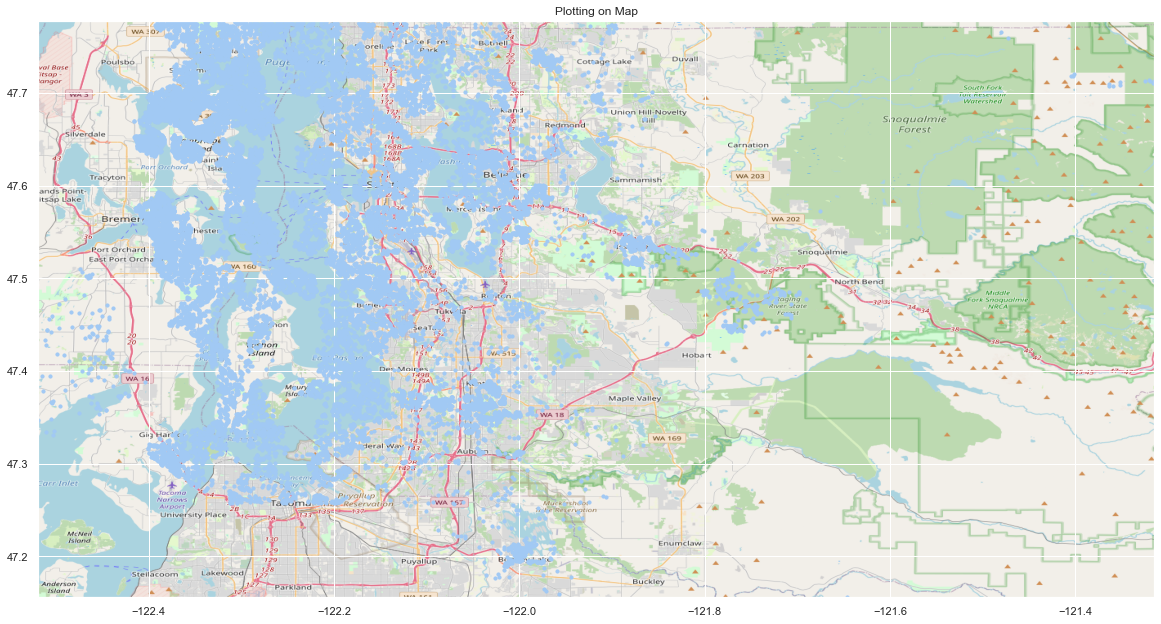

In [66]:
ruh_m = plt.imread('map.png')
fig, ax = plt.subplots(figsize = (20,18))
ax.scatter(df.long, df.lat, zorder=1, alpha= 1, c='b',s=10)
ax.set_title('Plotting on Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

In [67]:
df2=df.copy()
df2.sort_values(by=['zipcode'], inplace = True)
df2.set_index( "zipcode", inplace=True )

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,restoration_time
zipcode,,,,,,,,,,,,,,,,,,,,,
98001,4031700030,20150410T000000,299999.0,3,2.50,2380,9719,2.0,0,0,...,8,2380,0,2001,2001,47.2932,-122.283,2830,11505,0
98001,3353404265,20141231T000000,460000.0,3,2.50,2720,40813,2.0,0,0,...,8,2720,0,2001,2001,47.2619,-122.271,2250,40511,0
98001,2214800170,20150415T000000,295000.0,3,2.50,1940,10350,1.0,0,0,...,7,1420,520,1979,1979,47.3385,-122.256,1810,7800,0
98001,304100010,20141209T000000,269500.0,4,2.25,1700,7056,2.0,0,0,...,7,1700,0,1999,1999,47.3385,-122.262,1650,6025,0
98001,7696620100,20150422T000000,254999.0,3,1.00,1580,7560,1.0,0,0,...,7,1000,580,1976,1976,47.3318,-122.277,1580,7560,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98199,871000435,20150509T000000,812000.0,4,2.00,2380,6122,1.0,0,2,...,8,1310,1070,1949,1949,47.6506,-122.405,1810,5202,0
98199,1370803925,20140903T000000,535000.0,2,2.00,1510,5133,1.5,0,0,...,7,1510,0,1939,1939,47.6415,-122.401,1470,6000,0
98199,6823100225,20150414T000000,700000.0,4,1.75,1870,6000,1.0,0,0,...,8,1670,200,1949,1949,47.6435,-122.399,1710,6000,0


In [68]:
df2=df2.groupby(['zipcode']).mean()
df2

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,restoration_time
zipcode,,,,,,,,,,,,,,,,,,,,
98001,4.664787e+09,2.808047e+05,3.383978,2.006215,1900.856354,14937.450276,1.429558,0.000000,0.102210,3.337017,7.295580,1721.325967,179.530387,1980.679558,1981.602210,47.309020,-122.270646,1828.856354,11214.403315,0.922652
98002,4.850894e+09,2.342840e+05,3.326633,1.839196,1627.743719,7517.633166,1.334171,0.000000,0.010050,3.743719,6.693467,1522.537688,105.206030,1967.773869,1969.251256,47.308780,-122.213357,1479.030151,7585.482412,1.477387
98003,4.674182e+09,2.941113e+05,3.357143,2.047321,1928.882143,10603.096429,1.310714,0.000000,0.214286,3.371429,7.542857,1663.550000,265.332143,1976.885714,1977.428571,47.315741,-122.310054,1876.196429,9746.178571,0.542857
98004,4.394237e+09,1.355927e+06,3.854890,2.527603,2909.022082,13104.220820,1.432177,0.003155,0.305994,3.495268,8.687697,2419.842271,489.179811,1971.470032,1976.602524,47.616183,-122.205189,2674.700315,12805.022082,5.132492
98005,4.961872e+09,8.101649e+05,3.851190,2.424107,2656.803571,19928.785714,1.279762,0.000000,0.095238,3.696429,8.488095,2160.196429,496.607143,1969.744048,1970.863095,47.611532,-122.167268,2567.863095,18367.773810,1.119048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98177,3.934998e+09,6.761854e+05,3.396078,2.100000,2323.333333,11904.403922,1.276471,0.003922,0.815686,3.494118,7.976471,1836.713725,486.619608,1960.843137,1964.592157,47.742381,-122.369282,2186.196078,11690.239216,3.749020
98178,4.291467e+09,3.106128e+05,3.305344,1.731870,1729.351145,8309.122137,1.185115,0.034351,0.534351,3.320611,6.816794,1325.992366,403.358779,1955.232824,1957.809160,47.499118,-122.246969,1648.816794,8149.641221,2.576336
98188,4.481851e+09,2.890783e+05,3.433824,1.863971,1802.772059,10126.080882,1.227941,0.000000,0.147059,3.330882,7.036765,1492.154412,310.617647,1965.507353,1966.352941,47.447310,-122.280993,1636.279412,9752.801471,0.845588


In [69]:
df2_split = np.array_split(df2, 7)
df2_split[5].groupby(['zipcode']).mean()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,restoration_time
zipcode,,,,,,,,,,,,,,,,,,,,
98116,5.207714e+09,618634.169697,3.066667,1.987121,1853.369697,4979.421212,1.528788,0.003030,0.627273,3.512121,7.569697,1419.642424,433.727273,1953.675758,1960.712121,47.573905,-122.393621,1693.481818,4924.793939,7.036364
98117,4.262478e+09,576795.007233,3.019892,1.812839,1692.039783,4636.388788,1.457505,0.000000,0.182640,3.538879,7.282098,1333.359855,358.679928,1948.271248,1951.488246,47.686889,-122.378590,1540.000000,4639.746835,3.216998
98118,4.289018e+09,417637.433071,3.125984,1.763780,1686.746063,5780.421260,1.342520,0.007874,0.253937,3.348425,6.970472,1329.163386,357.582677,1950.311024,1953.856299,47.543804,-122.275567,1613.517717,5549.312992,3.545276
98119,4.303215e+09,849448.016304,3.260870,2.224185,2005.614130,3615.217391,1.793478,0.000000,0.548913,3.375000,8.021739,1589.961957,415.652174,1947.619565,1956.005435,47.640034,-122.366918,1865.434783,3727.494565,8.385870
98122,6.367750e+09,634360.179310,3.165517,2.064655,1785.048276,3508.624138,1.775862,0.000000,0.210345,3.306897,7.744828,1492.668966,292.379310,1949.834483,1959.289655,47.610160,-122.299772,1710.820690,3561.982759,9.455172
98125,4.913140e+09,469455.770732,3.202439,1.818902,1745.507317,7672.978049,1.376829,0.017073,0.256098,3.341463,7.175610,1422.007317,323.500000,1959.948780,1963.041463,47.717043,-122.301207,1657.019512,7303.607317,3.092683
98126,5.268250e+09,424706.355932,2.836158,1.678672,1543.596045,5114.610169,1.350282,0.000000,0.378531,3.466102,7.031073,1249.019774,294.576271,1952.725989,1956.460452,47.544584,-122.375274,1413.033898,5027.406780,3.734463
98133,4.658195e+09,386997.396761,3.131579,1.731781,1614.469636,7082.226721,1.400810,0.000000,0.020243,3.540486,7.125506,1361.971660,252.497976,1963.346154,1965.103239,47.735612,-122.343822,1554.900810,6719.718623,1.757085
98136,4.751358e+09,551688.673004,2.931559,1.865019,1726.828897,5982.319392,1.475285,0.019011,0.631179,3.395437,7.403042,1352.129278,374.699620,1956.703422,1961.406844,47.538807,-122.388205,1672.167300,5753.380228,4.703422


# run to view map

In [123]:
#guardo per zipcode

# find the row of the house which has the highest price
maxpr=df.loc[df['price'].idxmax()]
minpr=df.loc[df['price'].idxmin()]

# define a function to draw a basemap easily
def generateBaseMap(default_location=[47.5112, -122.257], default_zoom_start=9.4):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

df_copy = df.copy()
# select a zipcode for the heatmap
#set(df['zipcode'])
df_copy = df2_split[5].copy()
#df_copy = df[df['zipcode']==98019].copy()
df_copy['count'] = 1
basemap = generateBaseMap()
# add carton position map
folium.TileLayer('cartodbpositron').add_to(basemap)
s=folium.FeatureGroup(name='icon').add_to(basemap)
# add a marker for the house which has the highest price
folium.Marker([maxpr['lat'], maxpr['long']],popup='Highest Price: $'+str(format(maxpr['price'],'.0f')),
              icon=folium.Icon(color='green')).add_to(s)
folium.Marker([minpr['lat'], minpr['long']],popup='Lowest Price: $'+str(format(minpr['price'],'.0f')),
              icon=folium.Icon(color='red')).add_to(s)
# add heatmap
HeatMap(data=df_copy[['lat','long','count']].groupby(['lat','long']).sum().reset_index().values.tolist(),
        radius=8,max_zoom=13,name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed=False).add_to(basemap)

basemap.add_child(folium.LatLngPopup())

basemap


In [124]:

#totale case
# find the row of the house which has the highest price
maxpr=df.loc[df['price'].idxmax()]
minpr=df.loc[df['price'].idxmin()]

# define a function to draw a basemap easily
def generateBaseMap(default_location=[47.5112, -122.257], default_zoom_start=9.4):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

df_copy = df.copy()
# select a zipcode for the heatmap
#set(df['zipcode'])
#df_copy = df[df['zipcode']==98002].copy()
#df_copy = df[df['zipcode']==98019].copy()
df_copy['count'] = 1
basemap = generateBaseMap()
# add carton position map
folium.TileLayer('cartodbpositron').add_to(basemap)
s=folium.FeatureGroup(name='icon').add_to(basemap)
# add a marker for the house which has the highest price
folium.Marker([maxpr['lat'], maxpr['long']],popup='Highest Price: $'+str(format(maxpr['price'],'.0f')),
              icon=folium.Icon(color='green')).add_to(s)
folium.Marker([minpr['lat'], minpr['long']],popup='Lowest Price: $'+str(format(minpr['price'],'.0f')),
              icon=folium.Icon(color='red')).add_to(s)
# add heatmap
HeatMap(data=df_copy[['lat','long','count']].groupby(['lat','long']).sum().reset_index().values.tolist(),
        radius=8,max_zoom=13,name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed=False).add_to(basemap)

basemap.add_child(folium.LatLngPopup())

basemap

In [ ]:
#extra preprocessing

In [77]:
house=df.copy()

In [78]:
def df_characteristics(df):
    
    print('The shape of this dataframe is: {}'.format(df.shape), '\n')
    
    df_num = df.select_dtypes(include=[np.number])
    print('This dataframe has {} numeric features.'.format(df_num.shape[1]), '\n')
    print(df_num.columns, '\n')
    
    df_cat = df.select_dtypes(exclude=[np.number])
    print('This dataframe has {} categorical features.'.format(df_cat.shape[1]), '\n')
    print(df_cat.columns)

In [79]:
df_characteristics(house)

The shape of this dataframe is: (21613, 22) 

This dataframe has 21 numeric features. 

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'restoration_time'],
      dtype='object') 

This dataframe has 1 categorical features. 

Index(['date'], dtype='object')


In [80]:
def remove_collinear_features(x, threshold):
    
    # Create correlation matrix:
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []
    
    # Work through the iterations setup:
    for i in iters:
        for j in range(i+1):
            items = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = items.columns
            row = items.index
            val = abs(items.values)
            
            # Compare against threshold:
            if val >= threshold:
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])
                
    cols_to_drop = set(drop_cols)
    x = x.drop(columns = cols_to_drop, axis=1)
    
    return x

In [ ]:
#tramite questa funzione possiamo vedere che la maggior parte degli attributi sono numerici anche se l'anno di costruzione e l'anno di ristrutturazione sono definiti tramite variabili numeriche invece che anno.
house.describe()

In [82]:
#creo un dataset uguale ad house cosi da lavorare sempre sulla copia del dataset
house_copy = house.copy()

In [83]:
#creo una colonna che mi dirà da quanti anni è stata ristrutturata la casa (perchè ovviamente più recentemente è stata ristrutturata e più alto sarà il suo valore)
house_copy['Yrs_since_renovated'] = np.where(house_copy['yr_renovated'] == 0, (2022 - house_copy['yr_built']), (2022 - house_copy['yr_renovated']))

In [87]:
house_copy.dropna(inplace=True)

In [90]:
#sistemo il problema della data
house_copy['date'] = house_copy['date'].apply(lambda x: dt.datetime.strptime(x, '%Y%m%dT%H%M%S'))
house_copy['Month'] = house_copy['date'].apply(lambda date: date.month)
house_copy['Year'] = house_copy['date'].apply(lambda date: date.year)

In [91]:
#trasformo i float di bathrooms e floors in integers
house_copy['bathrooms'] = np.round(house_copy['bathrooms'])
house_copy['floors'] = np.round(house_copy['floors'])

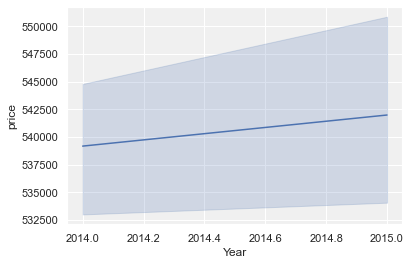

In [92]:
#controllo l'andamento del prezzo negli anni e sembra che anche se non in modo esponenziale tenda a salire
sns.lineplot(x='Year',y='price',data=house_copy)

In [93]:
#creo una funzione che calcola il range interquantile
def calc_interquartile(house_copy, column):
    global lower, upper
    #calcolo il primo e il terzo quartile
    first_quartile, third_quartile = np.percentile(house_copy[column], 25), np.percentile(house_copy[column], 75)
    #calcolo il range interquantile
    iqr = third_quartile - first_quartile
    #outlier cutoff e uso il valore generico del calcolo degli outlier 1.5
    cutoff = iqr*1.5
    #calcolo il limite inferiore e superiore
    lower, upper = first_quartile - cutoff , third_quartile + cutoff
    #rimuovo gli outlier dalle colonne
    upper_outliers = house_copy[house_copy[column] > upper]
    lower_outliers = house_copy[house_copy[column] < lower]
    print('Lower outliers', lower_outliers.shape[0])
    print('Upper outliers', upper_outliers.shape[0])
    return print('total outliers', upper_outliers.shape[0] + lower_outliers.shape[0])


In [94]:
#applico la funzione precedente a tutte le colonne per trovare gli outlier in ogni feature
for i in house_copy.columns:
    print('Total outliers in ', i)
    calc_interquartile(house_copy, i)
    print()

Total outliers in  id
Lower outliers 0
Upper outliers 0
total outliers 0

Total outliers in  date
Lower outliers 0
Upper outliers 0
total outliers 0

Total outliers in  price
Lower outliers 0
Upper outliers 1146
total outliers 1146

Total outliers in  bedrooms
Lower outliers 212
Upper outliers 334
total outliers 546

Total outliers in  bathrooms
Lower outliers 3947
Upper outliers 3815
total outliers 7762

Total outliers in  sqft_living
Lower outliers 0
Upper outliers 572
total outliers 572

Total outliers in  sqft_lot
Lower outliers 0
Upper outliers 2425
total outliers 2425

Total outliers in  floors
Lower outliers 0
Upper outliers 8
total outliers 8

Total outliers in  waterfront
Lower outliers 0
Upper outliers 163
total outliers 163

Total outliers in  view
Lower outliers 0
Upper outliers 2124
total outliers 2124

Total outliers in  condition
Lower outliers 30
Upper outliers 0
total outliers 30

Total outliers in  grade
Lower outliers 275
Upper outliers 1636
total outliers 1911

Tota

In [95]:
#creo una funzione per il calcolo degli zscore che sottrae la media da ogni punto e la divide per la deviazione standard e se il valore zscore di qualsiasi punto è minore di -3 o maggiore di 3, allora quel punto dati è un valore anomalo

def z_score(house_copy, column):
    #creo delle variabili globali per plottare il grafico 
    global zscore, outlier
     
    zscore = []
    outlier =[]
    
    threshold = 3
    
    mean = np.mean(house_copy[column])
    
    std = np.std(house_copy[column])
    for i in house_copy[column]:
        z = (i-mean)/std
        zscore.append(z)
        
        if np.abs(z) > threshold:
            outlier.append(i)
    return print('total outliers', len(outlier))


total outliers 406
2016.5 2012.5


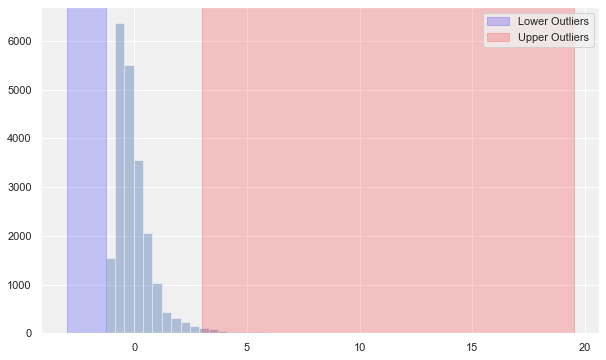

In [96]:
#plotto gli outlier per la variabile feature 
z_score(house_copy, 'price')
plt.figure(figsize = (10,6))
sns.distplot(zscore, kde=False)
print(upper, lower)
plt.axvspan(xmin = -3 ,xmax= min(zscore),alpha=0.2, color='blue', label='Lower Outliers')
plt.axvspan(xmin = 3 ,xmax= max(zscore),alpha=0.2, color='red', label='Upper Outliers')
plt.legend()
plt.show()


In [97]:
#applico ora la rimozione degli outlier tramite la zscore

dj=[]
for i in house_copy.price:
    if i in set(outlier):
        dj.append(0.0)
    else:
        dj.append(i)
        
house_copy['P'] = dj

house2= house_copy.drop(house_copy[house_copy['P'] == 0.0].index) 
house2.shape

(21207, 26)

In [98]:
#sistemo la variabile year renovated perchè alcune case non sono state ristrutturate da quando sono state costruite per cui sostituisco il valore zero con l'anno di costruzione
house2['yr_renovated'] = house2[['yr_renovated', 'yr_built']].apply(lambda pair: pair[0] if pair[0] != 0 else pair[1], axis=1)

In [99]:
# controllo le correlazioni
corr_features =[]

for i , r in house2.corr().iterrows():
    k=0
    for j in range(len(r)):
        if i!= r.index[k]:
            if r.values[k] >=0.5:
                corr_features.append([i, r.index[k], r.values[k]])
        k += 1
corr_features


[['price', 'sqft_living', 0.6649420390633328],
 ['price', 'grade', 0.6720699089272333],
 ['price', 'sqft_above', 0.5671393725708292],
 ['price', 'sqft_living15', 0.595248615352564],
 ['price', 'P', 1.0],
 ['bedrooms', 'sqft_living', 0.581191786402295],
 ['bathrooms', 'sqft_living', 0.6717854387142764],
 ['bathrooms', 'grade', 0.5558490097444979],
 ['bathrooms', 'sqft_above', 0.5601070148013279],
 ['sqft_living', 'price', 0.6649420390633328],
 ['sqft_living', 'bedrooms', 0.581191786402295],
 ['sqft_living', 'bathrooms', 0.6717854387142764],
 ['sqft_living', 'grade', 0.7381718721198105],
 ['sqft_living', 'sqft_above', 0.8633520425950245],
 ['sqft_living', 'sqft_living15', 0.7518067151295618],
 ['sqft_living', 'P', 0.6649420390633327],
 ['sqft_lot', 'sqft_lot15', 0.7195383742116734],
 ['grade', 'price', 0.6720699089272333],
 ['grade', 'bathrooms', 0.5558490097444979],
 ['grade', 'sqft_living', 0.7381718721198105],
 ['grade', 'sqft_above', 0.7333566592385126],
 ['grade', 'sqft_living15', 0

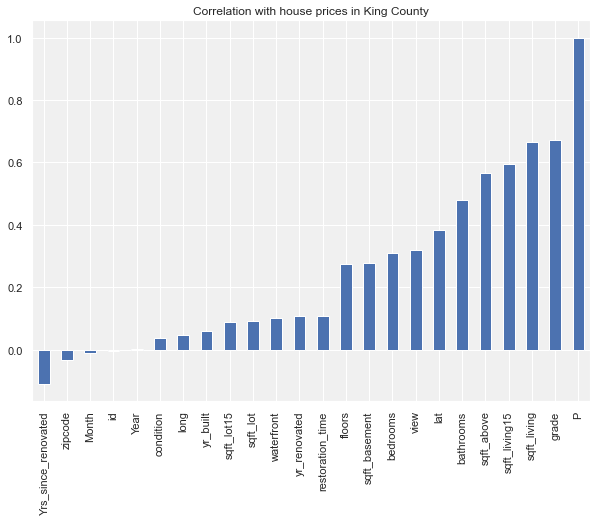

In [100]:
#correlazione del prezzo con le altre variabili
plt.figure(figsize=(10, 7))
house2.corr().sort_values('price').drop('price')['price'].plot(kind='bar', title='Correlation with house prices in King County')


[Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'Year of Renovation'),
 Text(0.5, 1.0, 'Relation between house price and year of renovation')]

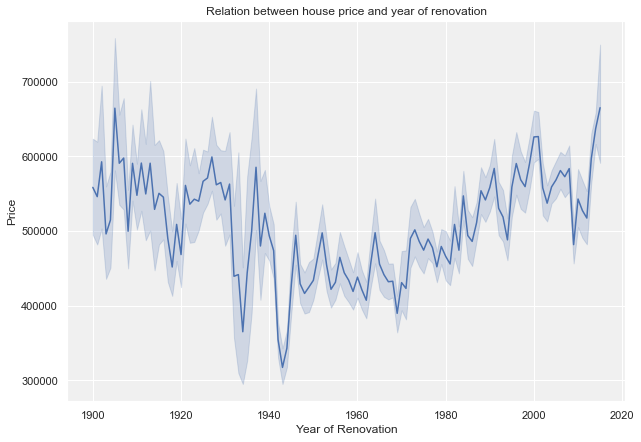

In [101]:
#vediamo come la ristrutturazione influenza i prezzi delle case

plt.figure(figsize=(10, 7))
sns.lineplot(x='yr_renovated', y='price', data=house2[house2['yr_renovated'] != 0]).set(xlabel='Year of Renovation', ylabel='Price',
                                                                                        title='Relation between house price and year of renovation')

#da questi valori sembra che le case ristrutturate tendono ad avere un prezzo maggiore

In [102]:
#controllo le correlazioni maggiori di 0.8 e le elimino
remove_collinear_features(house2, 0.8)

sqft_above | sqft_living | 0.86
yr_renovated | yr_built | 0.91
Yrs_since_renovated | yr_built | 0.91
Yrs_since_renovated | yr_renovated | 1.0
P | price | 1.0


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,restoration_time,Month,Year
0,7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0,0,...,0,1955,98178,47.5112,-122.257,1340,5650,0,10,2014
1,6414100192,2014-12-09,538000.0,3,2.0,2570,7242,2.0,0,0,...,400,1951,98125,47.7210,-122.319,1690,7639,40,12,2014
2,5631500400,2015-02-25,180000.0,2,1.0,770,10000,1.0,0,0,...,0,1933,98028,47.7379,-122.233,2720,8062,0,2,2015
3,2487200875,2014-12-09,604000.0,4,3.0,1960,5000,1.0,0,0,...,910,1965,98136,47.5208,-122.393,1360,5000,0,12,2014
4,1954400510,2015-02-18,510000.0,3,2.0,1680,8080,1.0,0,0,...,0,1987,98074,47.6168,-122.045,1800,7503,0,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.0,1530,1131,3.0,0,0,...,0,2009,98103,47.6993,-122.346,1530,1509,0,5,2014
21609,6600060120,2015-02-23,400000.0,4,2.0,2310,5813,2.0,0,0,...,0,2014,98146,47.5107,-122.362,1830,7200,0,2,2015
21610,1523300141,2014-06-23,402101.0,2,1.0,1020,1350,2.0,0,0,...,0,2009,98144,47.5944,-122.299,1020,2007,0,6,2014
21611,291310100,2015-01-16,400000.0,3,2.0,1600,2388,2.0,0,0,...,0,2004,98027,47.5345,-122.069,1410,1287,0,1,2015


In [103]:
#creo un dataframe in cui controllo le variabili che avevano la maggiore asimmetria positiva e di volta in volta controllo se è migliorato qualcosa
dataset_log = pd.DataFrame(columns=['Feature', 'Skew', 'Kurtosis'])
columns = ['lat', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'view','grade','sqft_basement','sqft_living15','sqft_lot15']
for col in columns:
    dataset_log.loc[dataset_log.shape[0]] = [col, house2[col].skew(), house2[col].kurtosis()]
dataset_log

,Feature,Skew,Kurtosis
0,lat,-0.465840,-0.712308
1,bedrooms,2.031795,51.938767
2,bathrooms,0.917062,2.009239
3,sqft_living,1.000265,1.577884
4,sqft_lot,13.187481,298.218324
5,waterfront,15.084675,225.568689
6,view,3.600168,12.509658
7,grade,0.628667,0.914283
8,sqft_basement,1.455190,1.523093
9,sqft_living15,1.035913,1.323737


Asimmetria lat: -0.4658404343107719
Curtosi lat: -0.712308168404943
Asimmetria bed: 2.0317949387494467
Curtosi bed: 51.93876697604471
Asimmetria bathrooms: 0.9170622257478809
Curtosi bathrooms: 2.0092388985906884


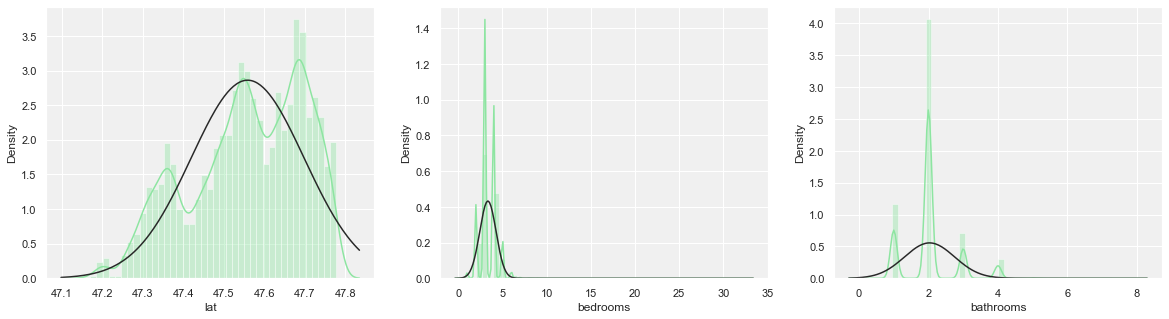

In [106]:
#applico la trasformazione logaritmica a quelle variabili con code di outlier positive
fig, ax = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(20)
sns.distplot(house2['lat'], color="g", fit=norm, ax=ax[0])
sns.distplot(house2['bedrooms'], color="g", fit=norm, ax=ax[1])
sns.distplot(house2['bathrooms'], color="g", fit=norm, ax=ax[2])

print("Asimmetria lat:",house2['lat'].skew())
print("Curtosi lat:",house2['lat'].kurtosis())

print("Asimmetria bed:",house2['bedrooms'].skew())
print("Curtosi bed:",house2['bedrooms'].kurtosis())

print("Asimmetria bathrooms:",house2['bathrooms'].skew())
print("Curtosi bathrooms:",house2['bathrooms'].kurtosis())


Asimmetria: 1.000265184331813
Curtosi: 1.5778839974158854
Asimmetria: 13.187480891943975
Curtosi: 298.2183244896106
Asimmetria: 15.084674859894587
Curtosi: 225.56868866078662


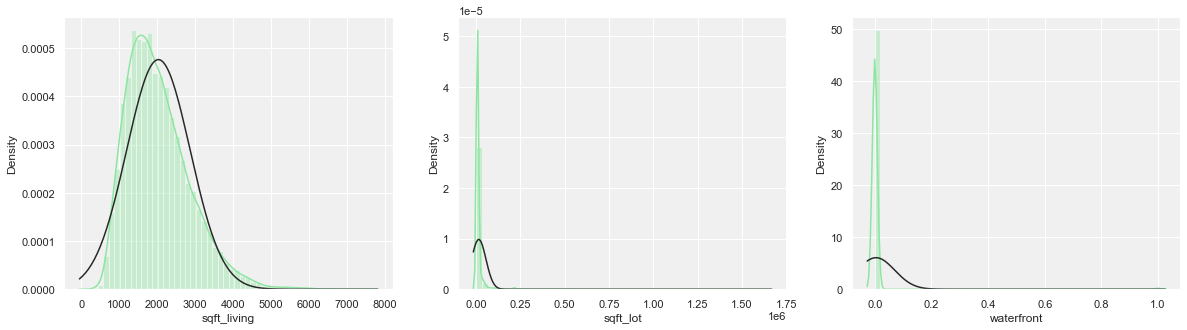

In [107]:
fig, ax = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(20)
sns.distplot(house2['sqft_living'], color="g", fit=norm, ax=ax[0])
sns.distplot(house2['sqft_lot'], color="g", fit=norm, ax=ax[1])
sns.distplot(house2['waterfront'], color="g", fit=norm, ax=ax[2])

print("Asimmetria:",house2['sqft_living'].skew())
print("Curtosi:",house2['sqft_living'].kurtosis())

print("Asimmetria:",house2['sqft_lot'].skew())
print("Curtosi:",house2['sqft_lot'].kurtosis())

print("Asimmetria:",house2['waterfront'].skew())
print("Curtosi:",house2['waterfront'].kurtosis())

Asimmetria: 3.6001680027934406
Curtosi: 12.509657806924691
Asimmetria: 0.6286666323899702
Curtosi: 0.9142834295551241
Asimmetria: 1.4551896035423375
Curtosi: 1.5230931681779771


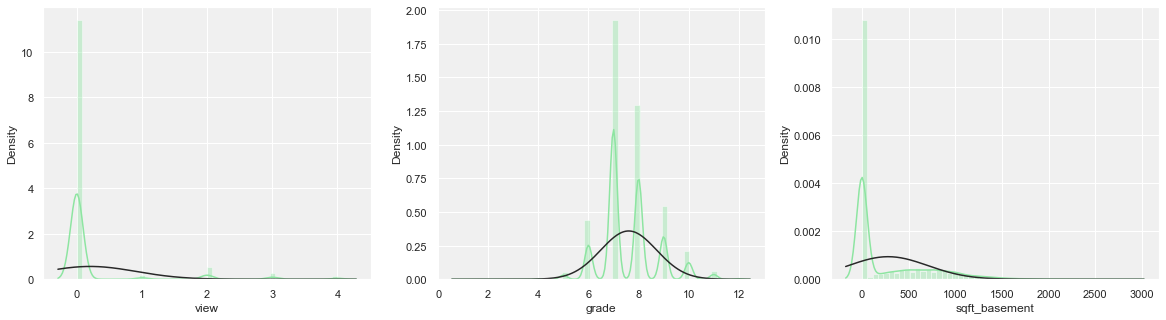

In [108]:
fig, ax = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(20)
sns.distplot(house2['view'], color="g", fit=norm, ax=ax[0])
sns.distplot(house2['grade'], color="g", fit=norm, ax=ax[1])
sns.distplot(house2['sqft_basement'], color="g", fit=norm, ax=ax[2])

print("Asimmetria:",house2['view'].skew())
print("Curtosi:",house2['view'].kurtosis())

print("Asimmetria:",house2['grade'].skew())
print("Curtosi:",house2['grade'].kurtosis())

print("Asimmetria:",house2['sqft_basement'].skew())
print("Curtosi:",house2['sqft_basement'].kurtosis())

Asimmetria: 1.035912831669052
Curtosi: 1.3237374189246025
Asimmetria: 9.563832404669956
Curtosi: 153.08113128304242


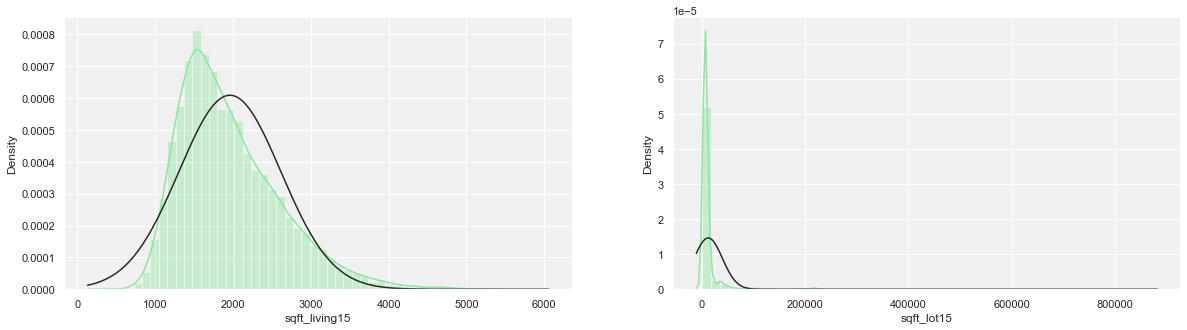

In [109]:
fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(20)

sns.distplot(house2['sqft_living15'], color="g", fit=norm, ax=ax[0])
sns.distplot(house2['sqft_lot15'], color="g", fit=norm, ax=ax[1])


print("Asimmetria:",house2['sqft_living15'].skew())
print("Curtosi:",house2['sqft_living15'].kurtosis())

print("Asimmetria:",house2['sqft_lot15'].skew())
print("Curtosi:",house2['sqft_lot15'].kurtosis())


Asimmetria: -0.4658404343107719
Curtosi: -0.712308168404943
Asimmetria: 2.0317949387494467
Curtosi: 51.93876697604471
Asimmetria: 0.9170622257478809
Curtosi: 2.0092388985906884


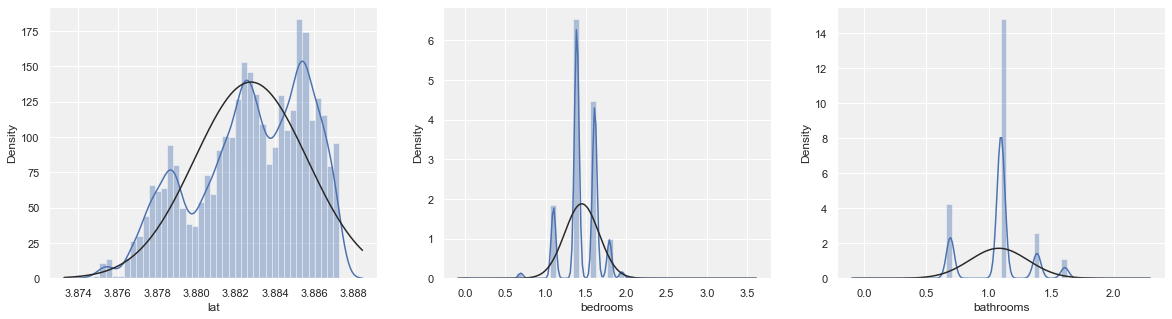

In [110]:
#per l'asimmetria 'skewness' da -0.5 a 0.5: curva abbastanza simmetrica. Da -1 a -0.5 o +0.5 a +1.0 moderata asimmetria. Oltre questo range: altamente asimmetrica
#per la curtosi invece Se > 3: alta curtosi, code lunghe, molti valori estremi possibilmente anomali. Se = 3: distribuzione normale. Se < 3: code corte, pochi valori estremi
#la maggior parte delle variabili presenta forte asimmetria e una curtosi molto alta per cui provo ad applicare la trasformazione logaritmica alle variabili per vedere se migliorano
#applico la trasformazione logaritmica
fig, ax = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(20)
sns.distplot(np.log1p(house2['lat']), fit=norm, ax=ax[0])
sns.distplot(np.log1p(house2['bedrooms']), fit=norm, ax=ax[1])
sns.distplot(np.log1p(house2['bathrooms']), fit=norm, ax=ax[2])

print("Asimmetria:",house2['lat'].skew())
print("Curtosi:",house2['lat'].kurtosis())

print("Asimmetria:",house2['bedrooms'].skew())
print("Curtosi:",house2['bedrooms'].kurtosis())

print("Asimmetria:",house2['bathrooms'].skew())
print("Curtosi:",house2['bathrooms'].kurtosis())

In [111]:
dataset_log.loc[dataset_log['Skew'] > 1]

,Feature,Skew,Kurtosis
1,bedrooms,2.031795,51.938767
3,sqft_living,1.000265,1.577884
4,sqft_lot,13.187481,298.218324
5,waterfront,15.084675,225.568689
6,view,3.600168,12.509658
8,sqft_basement,1.455190,1.523093
9,sqft_living15,1.035913,1.323737
10,sqft_lot15,9.563832,153.081131


Asimmetria: 3.6001680027934406
Curtosi: 12.509657806924691
Asimmetria: 0.6286666323899702
Curtosi: 0.9142834295551241
Asimmetria: 1.4551896035423375
Curtosi: 1.5230931681779771


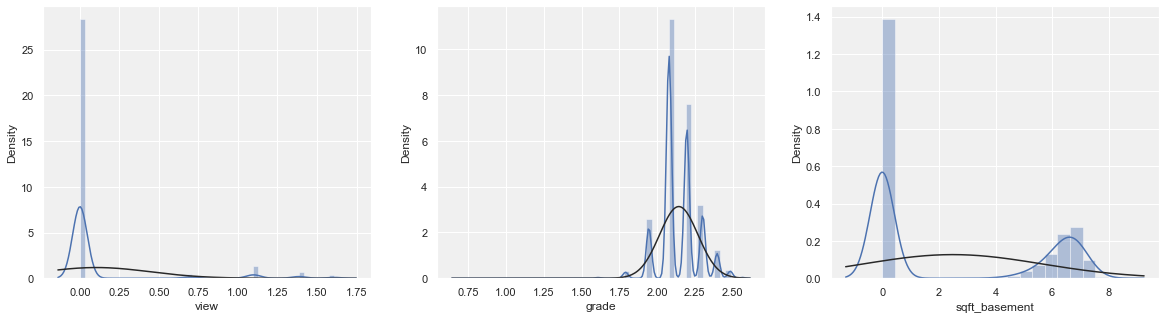

In [112]:
fig, ax = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(20)
sns.distplot(np.log1p(house2['view']), fit=norm, ax=ax[0])
sns.distplot(np.log1p(house2['grade']), fit=norm, ax=ax[1])
sns.distplot(np.log1p(house2['sqft_basement']), fit=norm, ax=ax[2])

print("Asimmetria:",house2['view'].skew())
print("Curtosi:",house2['view'].kurtosis())

print("Asimmetria:",house2['grade'].skew())
print("Curtosi:",house2['grade'].kurtosis())

print("Asimmetria:",house2['sqft_basement'].skew())
print("Curtosi:",house2['sqft_basement'].kurtosis())

In [113]:
dataset_log.loc[dataset_log['Skew'] > 1]

,Feature,Skew,Kurtosis
1,bedrooms,2.031795,51.938767
3,sqft_living,1.000265,1.577884
4,sqft_lot,13.187481,298.218324
5,waterfront,15.084675,225.568689
6,view,3.600168,12.509658
8,sqft_basement,1.455190,1.523093
9,sqft_living15,1.035913,1.323737
10,sqft_lot15,9.563832,153.081131


Asimmetria: 1.035912831669052
Curtosi: 1.3237374189246025
Asimmetria: 9.563832404669956
Curtosi: 153.08113128304242


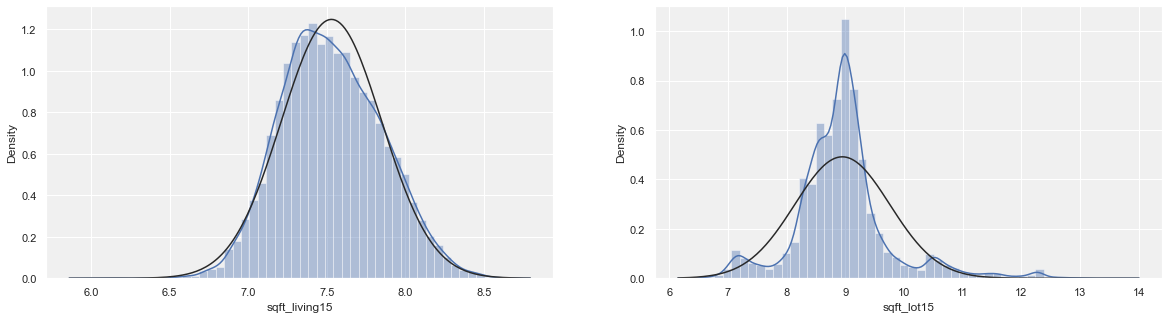

In [114]:
fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(20)

sns.distplot(np.log1p(house2['sqft_living15']), fit=norm, ax=ax[0])
sns.distplot(np.log1p(house2['sqft_lot15']), fit=norm, ax=ax[1])


print("Asimmetria:",house2['sqft_living15'].skew())
print("Curtosi:",house2['sqft_living15'].kurtosis())

print("Asimmetria:",house2['sqft_lot15'].skew())
print("Curtosi:",house2['sqft_lot15'].kurtosis())

In [115]:
dataset_log.loc[dataset_log['Skew'] > 1]

,Feature,Skew,Kurtosis
1,bedrooms,2.031795,51.938767
3,sqft_living,1.000265,1.577884
4,sqft_lot,13.187481,298.218324
5,waterfront,15.084675,225.568689
6,view,3.600168,12.509658
8,sqft_basement,1.455190,1.523093
9,sqft_living15,1.035913,1.323737
10,sqft_lot15,9.563832,153.081131


In [116]:
#controllo nuovamente gli outlier per controllare se le features sono più normalizzate dopo la trasformazione logaritmica
def calc_interquartile(house2, column):
    global lower, upper
    #calcolo il primo e il terzo quartile
    first_quartile, third_quartile = np.percentile(house2[column], 25), np.percentile(house2[column], 75)
    #calcolo il range interquantile
    iqr = third_quartile - first_quartile
    #outlier cutoff e uso il valore generico del calcolo degli outlier 1.5
    cutoff = iqr*1.5
    #calcolo il limite inferiore e superiore
    lower, upper = first_quartile - cutoff , third_quartile + cutoff
    #rimuovo gli outlier dalle colonne
    upper_outliers = house2[house2[column] > upper]
    lower_outliers = house2[house2[column] < lower]
    print('Lower outliers', lower_outliers.shape[0])
    print('Upper outliers', upper_outliers.shape[0])
    return print('total outliers', upper_outliers.shape[0] + lower_outliers.shape[0])





In [117]:
for i in house2.columns:
    print('Total outliers in ', i)
    calc_interquartile(house2, i)
    print()

Total outliers in  id
Lower outliers 0
Upper outliers 0
total outliers 0

Total outliers in  date
Lower outliers 0
Upper outliers 0
total outliers 0

Total outliers in  price
Lower outliers 0
Upper outliers 829
total outliers 829

Total outliers in  bedrooms
Lower outliers 212
Upper outliers 304
total outliers 516

Total outliers in  bathrooms
Lower outliers 3947
Upper outliers 3480
total outliers 7427

Total outliers in  sqft_living
Lower outliers 0
Upper outliers 416
total outliers 416

Total outliers in  sqft_lot
Lower outliers 0
Upper outliers 2339
total outliers 2339

Total outliers in  floors
Lower outliers 0
Upper outliers 7
total outliers 7

Total outliers in  waterfront
Lower outliers 0
Upper outliers 92
total outliers 92

Total outliers in  view
Lower outliers 0
Upper outliers 1889
total outliers 1889

Total outliers in  condition
Lower outliers 30
Upper outliers 0
total outliers 30

Total outliers in  grade
Lower outliers 275
Upper outliers 1313
total outliers 1588

Total ou

In [118]:
def z_score(house2, column):
    #creo delle variabili globali per plottare il grafico 
    global zscore, outlier
     
    zscore = []
    outlier =[]
    
    threshold = 3
    
    mean = np.mean(house2[column])
    
    std = np.std(house2[column])
    for i in house2[column]:
        z = (i-mean)/std
        zscore.append(z)
        
        if np.abs(z) > threshold:
            outlier.append(i)
    return print('total outliers', len(outlier))

total outliers 418
1088437.5 -141062.5


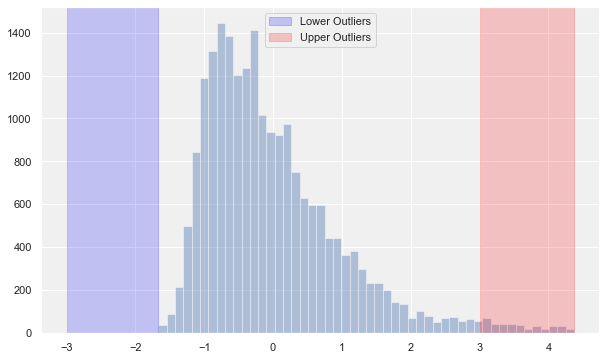

In [119]:
z_score(house2, 'price')
plt.figure(figsize = (10,6))
sns.distplot(zscore, kde=False)
print(upper, lower)
plt.axvspan(xmin = -3 ,xmax= min(zscore),alpha=0.2, color='blue', label='Lower Outliers')
plt.axvspan(xmin = 3 ,xmax= max(zscore),alpha=0.2, color='red', label='Upper Outliers')
plt.legend()
plt.show()